<a href="https://colab.research.google.com/github/rahulsait/ExcelR-codes/blob/main/REVIEWS_CLASSIFICATION_NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
data = pd.read_csv("Hamspam.csv", encoding = "ISO-8859-1")

In [23]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [24]:
# Checking the null values if any :

data.isnull().sum()

type    0
text    0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


## **Data Cleaning :**

In [26]:
# Make the text lowercase, remove texts in square brackets, remove all the punctuations and words containing numbers :

import re # regural expression - replaces the above mentioned texts to something favouring the model 
import string

def clean_text(text) :

  text = text.lower()
  text = re.sub('\[.*?\]', " ", text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub("[0-9" "]+", " ", text)
  text = re.sub('[' '" "...]', ' ', text)
  return text 

clean = lambda x:clean_text(x)  

In [27]:
data["text"] = data.text.apply(clean)
data.text

0       hope you are having a good week  just checking in
1                                 k  give back my thanks 
2             am also doing in cbe only  but have to pay 
3       complimentary   star ibiza holiday or å£    ca...
4       okmail  dear dave this is your final notice to...
                              ...                        
5554    you are a great role model  you are giving so ...
5555    awesome  i remember the last time we got someb...
5556    if you don t  your prize will go to another cu...
5557    sms  ac jsco  energy is high  but u may not kn...
5558                      shall call now dear having food
Name: text, Length: 5559, dtype: object

In [34]:
# Word frequencies :

freq = pd.Series(' '.join(data["text"]).split()).value_counts()[:20]
freq

i       2989
to      2245
you     2233
a       1442
u       1376
the     1329
and      973
in       901
is       896
me       805
my       762
it       740
for      709
your     663
of       620
call     592
have     577
that     572
s        559
on       536
dtype: int64

In [39]:
# removing stopwords :

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# words frequencies after removal of stopwords :

freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20]
freq_Sw

u       1376
call     592
ur       390
get      389
å£       302
ok       293
go       284
free     284
know     262
like     247
good     247
got      240
come     231
day      230
time     220
love     212
send     200
text     193
want     192
txt      177
dtype: int64

In [41]:
# computing the frequencies of words using Count Vectorizer :

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["text"])

word_freq_df = pd.DataFrame({'term' : vectorizer.get_feature_names(), 'occurences' : np.asarray(X.sum(axis = 0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurences']/np.sum(word_freq_df['occurences'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
word_freq_df.head(30)

,term,occurences,frequency
0,aa,1,0.000022
1,aah,3,0.000066
2,aaniye,1,0.000022
3,aaooooright,1,0.000022
4,aathi,6,0.000131
5,ab,1,0.000022
6,abbey,1,0.000022
7,abdomen,1,0.000022
8,abeg,1,0.000022
9,abel,1,0.000022


In [58]:
# TFIDF :

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000, max_df = 0.5, smooth_idf = True)
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [59]:
df

,abiola,able,abt,ac,accept,access,account,actually,add,address,...,yo,yr,yrs,yup,ââ,ââèïs,ââèït,ûªs,ûªt,ûï
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.320988,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **N-Gram :**

In [62]:
# Bi-Gram :

def get_top_n2_words(corpus, n = None):
  vec1 = CountVectorizer(ngram_range = (2,2), max_features = 2000).fit(corpus)
  bag_of_words = vec1.transform(corpus)
  sum_words = bag_of_words.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
  return words_freq[:n]
                        

In [63]:
top2_words = get_top_n2_words(data["text"], n = 200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-Gram", "freq"]
top2_df.head()

,Bi-Gram,freq
0,please call,55
1,call later,50
2,co uk,49
3,let know,40
4,sorry call,38


[Text(0, 0, 'please call'),
 Text(0, 0, 'call later'),
 Text(0, 0, 'co uk'),
 Text(0, 0, 'let know'),
 Text(0, 0, 'sorry call'),
 Text(0, 0, 'take care'),
 Text(0, 0, 'good morning'),
 Text(0, 0, 'po box'),
 Text(0, 0, 'call landline'),
 Text(0, 0, 'guaranteed call'),
 Text(0, 0, 'new year'),
 Text(0, 0, 'prize guaranteed'),
 Text(0, 0, 'ok lor'),
 Text(0, 0, 'pls send'),
 Text(0, 0, 'every week'),
 Text(0, 0, 'send stop'),
 Text(0, 0, 'national rate'),
 Text(0, 0, 'good night'),
 Text(0, 0, 'free call'),
 Text(0, 0, 'last night')]

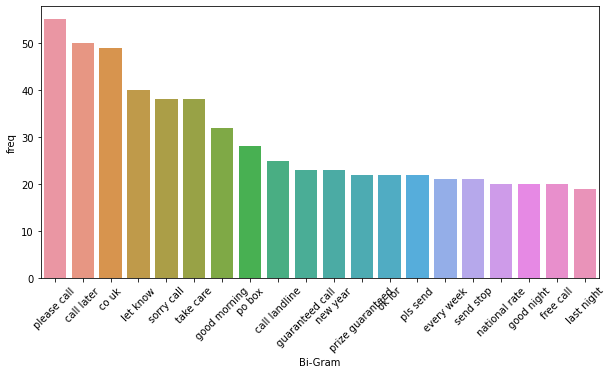

In [64]:
# Bi-Gram Plot :

import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10,5))
plot = sns.barplot(x = top20_bigram["Bi-Gram"], y = top20_bigram["freq"])
plot.set_xticklabels(rotation = 45, labels = top20_bigram["Bi-Gram"])

In [65]:
# Tri-Gram :

def get_top_n3_words(corpus, n = None):
  vec1 = CountVectorizer(ngram_range = (3,3), max_features = 2000).fit(corpus)
  bag_of_words = vec1.transform(corpus)
  sum_words = bag_of_words.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
  return words_freq[:n]


In [66]:
top3_words = get_top_n3_words(data["text"], n = 200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-Gram", "freq"]
top3_df.head()

,Tri-Gram,freq
0,sorry call later,38
1,prize guaranteed call,21
2,call land line,18
3,happy new year,18
4,private account statement,16


In [67]:
top3_df

,Tri-Gram,freq
0,sorry call later,38
1,prize guaranteed call,21
2,call land line,18
3,happy new year,18
4,private account statement,16
...,...,...
195,day wife nt,5
196,wife nt wish,5
197,nt wish parents,5
198,wish parents forgot,5


[Text(0, 0, 'sorry call later'),
 Text(0, 0, 'prize guaranteed call'),
 Text(0, 0, 'call land line'),
 Text(0, 0, 'happy new year'),
 Text(0, 0, 'private account statement'),
 Text(0, 0, 'call identifier code'),
 Text(0, 0, 'guaranteed call land'),
 Text(0, 0, 'identifier code expires'),
 Text(0, 0, 'land line claim'),
 Text(0, 0, 'draw shows prize'),
 Text(0, 0, 'shows prize guaranteed'),
 Text(0, 0, 'pls send message'),
 Text(0, 0, 'account statement shows'),
 Text(0, 0, 'camcorder reply call'),
 Text(0, 0, 'cant pick phone'),
 Text(0, 0, 'pick phone right'),
 Text(0, 0, 'phone right pls'),
 Text(0, 0, 'right pls send'),
 Text(0, 0, 'shows un redeemed'),
 Text(0, 0, 'un redeemed points')]

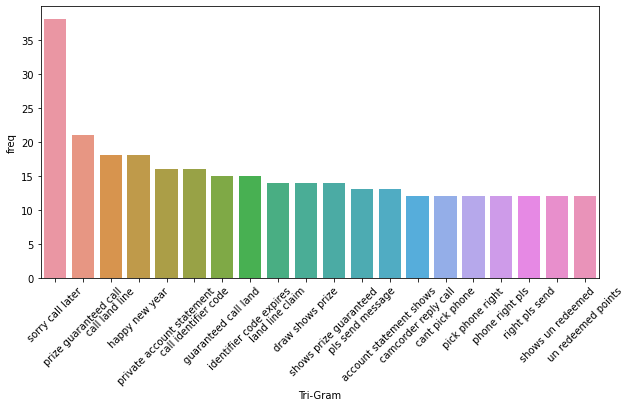

In [68]:
# Tri-Gram Plot :

import matplotlib.pyplot as plt
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10,5))
plot = sns.barplot(x = top20_trigram["Tri-Gram"], y = top20_trigram["freq"])
plot.set_xticklabels(rotation = 45, labels = top20_trigram["Tri-Gram"])

# **WordCloud :**

In [69]:
string_Total = " ".join(data["text"])

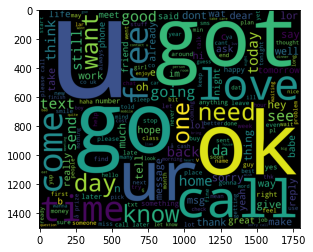

In [70]:
# WordCloud for entire corpus :

from wordcloud import WordCloud
wordcloud_stw = WordCloud(background_color = "black", width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw)

# **Applying Naive Bayes for Classification :**

In [71]:
data.head()

,type,text
0,ham,hope good week checking
1,ham,k give back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...


In [72]:
def split_into_words(i) :
  return(i.split(" "))

In [73]:
from sklearn.model_selection import train_test_split
email_train, email_test = train_test_split(data, test_size = 0.3)

In [74]:
email_test

,type,text
2875,ham,guai u shd haf seen naughty u free today go jo...
2708,ham,need ke qi u bored izzit suddenly thk
1285,ham,hiya probably coming home weekend next
1483,ham,see film
3796,ham,specialisation work slave labor look month sha...
...,...,...
4833,ham,okie scared u say fat u dun wan already
3690,ham,lol need cash nitros hurry come crash
889,spam,u win å£ music gift vouchers every week starti...
3808,ham,u doin baby girl hope u okay every time call u...


In [75]:
# Preparing email texts into word count matrix format using CountVectorizer :

emails_bow = CountVectorizer(analyzer = split_into_words).fit(data.text)

In [76]:
# For all messages :

all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape

(5559, 7488)

In [78]:
# For training messages :

train_emails_matrix = emails_bow.transform(email_train.text)
train_emails_matrix.shape

(3891, 7488)

In [79]:
# For testing messages :

test_emails_matrix = emails_bow.transform(email_test.text)
test_emails_matrix.shape

(1668, 7488)

In [84]:
# Preparing a Naive Bayes model on training data set
# Without TFIDF :

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes :

classifier_mb = MB()
classifier_mb.fit(train_emails_matrix, email_train.type)

train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m == email_train.type)

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m == email_test.type)

print(accuracy_train_m)
print(accuracy_test_m)

0.9912618864045233
0.9778177458033573


In [86]:
# Using TFIDF :

from sklearn.feature_extraction.text import TfidfTransformer

# Transforming emails into TFIDF :

tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# TFIDF for train emails :

train_tfidf = tfidf_transformer.transform(train_emails_matrix)
print(train_tfidf.shape)

# TFIDF for test emails :

test_tfidf = tfidf_transformer.transform(test_emails_matrix)
print(test_tfidf.shape)


(3891, 7488)
(1668, 7488)


In [87]:
# Preparing a Naive Bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes :

classifier_mb = MB()
classifier_mb.fit(train_tfidf, email_train.type)

train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m == email_train.type)

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m == email_test.type)

print(accuracy_train_m)
print(accuracy_test_m)

0.9727576458493961
0.9700239808153477
